## Data Cleaning and Preprocessing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re
import string

In [3]:
df=pd.read_csv("../data/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Text Cleaning

In [4]:
import nltk
from nltk.corpus import stopwords

In [5]:
stops=set(stopwords.words('english'))

In [6]:
def clean_text(string):
    string_clean=string.strip()
    string_clean=string_clean.replace("<br />","")
    string_clean=re.sub(r'[.]+',r' ',string_clean)
    string_clean=re.sub(r"[^A-za-z\s']+",'',string_clean)
    string_clean=re.split(r'[\s]+',string_clean)
    string_clean=[word for word in string_clean if word.lower() not in stops]
    string_clean=" ".join(string_clean)
    return string_clean.lower()

In [7]:
df['clean_review']=df['review'].apply(lambda x:clean_text(x))

In [8]:
df.iloc[-1,:]['clean_review']

"one expects star trek movies high art fans expect movie good best episodes unfortunately movie muddled implausible plot left cringing far worst nine far movies even chance watch well known characters interact another movie can't save movie including goofy scenes kirk spock mccoy yosemite would say movie worth rental hardly worth watching however true fan needs see movies renting movie way see even cable channels avoid movie "

In [9]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there's family little boy jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love time money visually stunn...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,i'm going disagree previous comment side malti...


## Define a Vocabulary

In [10]:
df['num_words']=df['clean_review'].apply(lambda x: len(x.split(" ")))

In [11]:
df.drop('review',axis=1,inplace=True)

In [12]:
df

,sentiment,clean_review,num_words
0,positive,one reviewers mentioned watching oz episode ho...,165
1,positive,wonderful little production filming technique ...,85
2,positive,thought wonderful way spend time hot summer we...,86
3,negative,basically there's family little boy jake think...,67
4,positive,petter mattei's love time money visually stunn...,126
...,...,...,...
49995,positive,thought movie right good job creative original...,77
49996,negative,bad plot bad dialogue bad acting idiotic direc...,57
49997,negative,catholic taught parochial elementary schools n...,114
49998,negative,i'm going disagree previous comment side malti...,115


In [13]:
df['num_words'].sum()

5934648

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_words', ylabel='Density'>

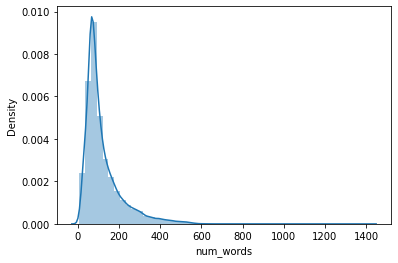

In [14]:
sns.distplot(df[df['sentiment']=='positive']['num_words'])

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_words', ylabel='Density'>

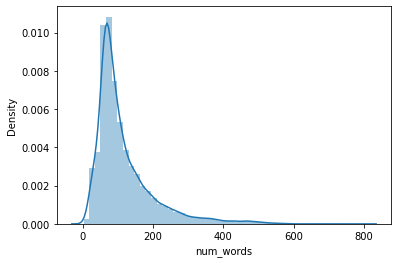

In [15]:
sns.distplot(df[df['sentiment']=='negative']['num_words'])

We have an average of about 100 meaningful words in both positive and negative movie reviews

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

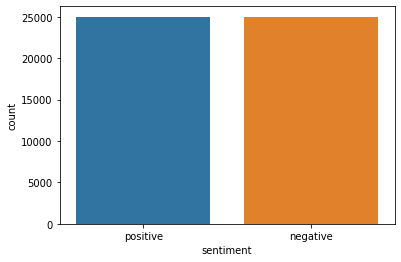

In [16]:
sns.countplot(df['sentiment'])

Balanced dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train,test = train_test_split(df, test_size=0.3, random_state=42)
test,validation=train_test_split(test,test_size=0.5,random_state=42)

In [19]:
train.to_csv('../input/train.csv')
test.to_csv('../input/test.csv')
validation.to_csv('../input/validation.csv')